# Convolutional AutoEncoder for Image Classification

# Importing Libraries

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model

# Loading the Dataset

In [39]:
from tensorflow.keras.datasets import fashion_mnist

In [40]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [41]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [42]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Visualizing the Images

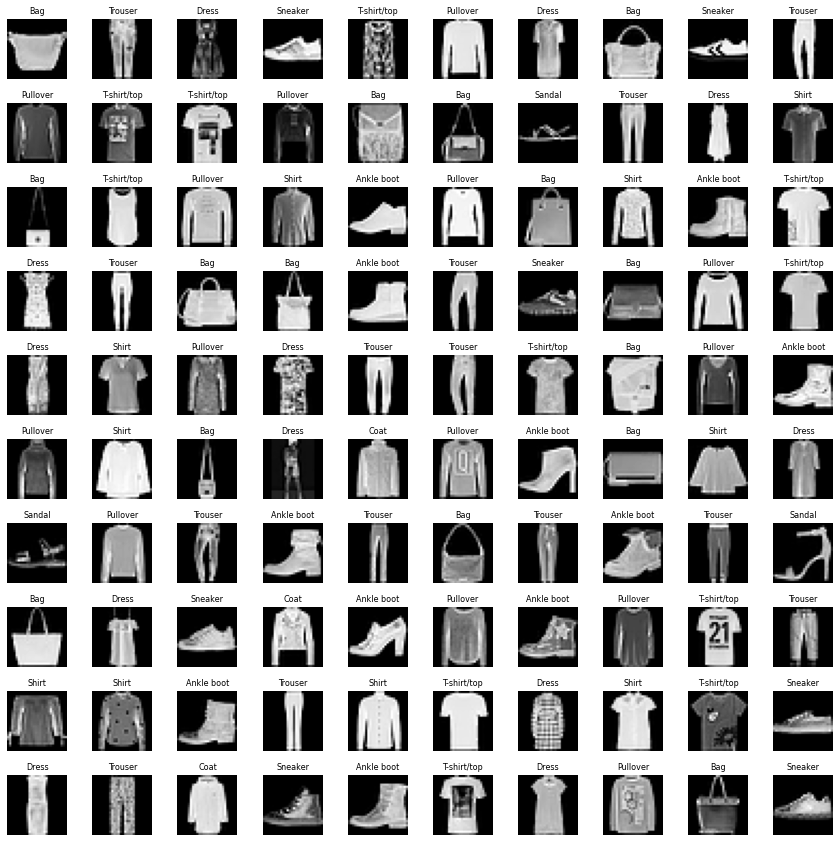

In [43]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(x_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Preprocessing the Images

In [44]:
x_train = x_train/255
x_test = x_test/255
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [45]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [46]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Building and Training the AutoEncoder

In [47]:
autoencoder = Sequential()

#Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

#Decoder

autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))

autoencoder.add(UpSampling2D(size=(2,2)))


autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_7 (Flatten)         (None, 128)              

In [48]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
autoencoder.fit(x_train, x_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 102s 53ms/step - loss: 0.3156 - accuracy: 0.5036
Epoch 2/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2860 - accuracy: 0.5067
Epoch 3/50
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2821 - accuracy: 0.5071
Epoch 4/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2800 - accuracy: 0.5074
Epoch 5/50
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2785 - accuracy: 0.5076
Epoch 6/50
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2774 - accuracy: 0.5078
Epoch 7/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2765 - accuracy: 0.5079
Epoch 8/50
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2758 - accuracy: 0.5080
Epoch 9/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2752 - accuracy: 0.5081
Epoch 10/50
1875/1875 [==============================] - 98s 

# Encoding and Decoding the test images

In [52]:
autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_7 (Flatten)         (None, 128)              

In [53]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_7').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                             

In [54]:
coded_test_images = encoder.predict(x_test)
coded_test_images.shape

313/313 [==============================] - 3s 8ms/step


(10000, 128)

In [55]:
coded_test_images[0]

array([0.09960657, 1.7241701 , 0.8140671 , 0.33208105, 1.1474581 ,
       0.9585589 , 0.3196457 , 0.23480096, 0.45679215, 2.2835624 ,
       0.87250364, 0.19300991, 1.482274  , 0.9027041 , 0.7048554 ,
       0.13834384, 0.5141307 , 2.3905678 , 0.8235804 , 0.        ,
       1.4908866 , 0.89064014, 0.83327913, 0.21231207, 0.84659654,
       1.3210946 , 0.35921463, 0.1068823 , 1.5212673 , 1.0365927 ,
       0.6499166 , 0.77144766, 0.        , 1.9114307 , 0.88696873,
       0.10490228, 1.5563833 , 1.2131406 , 0.49443686, 0.17197281,
       0.98265797, 1.9518564 , 0.9024817 , 0.        , 2.4697487 ,
       1.9287552 , 1.1385896 , 0.        , 1.0795665 , 0.9564821 ,
       0.6800362 , 0.        , 1.565605  , 1.8104365 , 1.3054427 ,
       0.        , 0.5448329 , 0.6933056 , 0.67359656, 0.        ,
       0.6746814 , 1.266274  , 0.26758236, 0.78170097, 0.9096888 ,
       1.0260742 , 0.89830244, 0.        , 1.5794739 , 1.706498  ,
       1.1364481 , 0.        , 1.3565762 , 0.87334716, 0.99572

In [56]:
decoded_test_images = autoencoder.predict(x_test)
decoded_test_images.shape

313/313 [==============================] - 6s 20ms/step


(10000, 28, 28, 1)

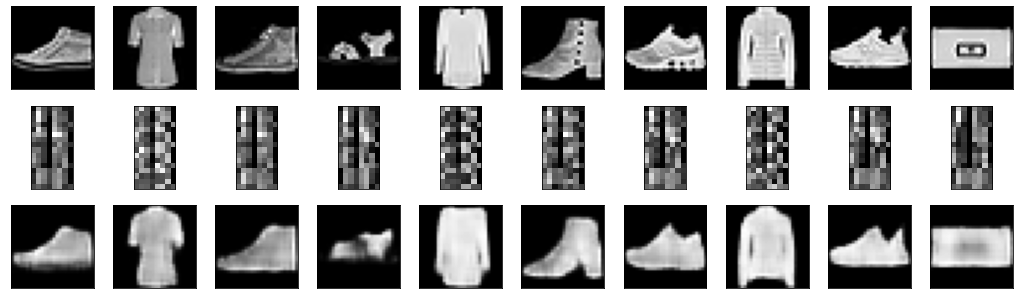

In [58]:
n_images = 10
test_images = np.random.randint(0, x_test.shape[0], size = (n_images))
plt.figure(figsize = (18, 18))
for i, image_index in enumerate(test_images):
  #original images
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  #Coded images
  ax = plt.subplot(10, 10, i+1+n_images)
  plt.imshow(coded_test_images[image_index].reshape(16, 8), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  #Decoded Imagea
  ax = plt.subplot(10, 10, i+1+n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28, 28), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())


Here are the Original Images, Encoded and Decoded Images.